# DATA VISUALIZATION
This notebook uses the data stored in fron-page.json file. It is created after web scraping the reddit front page which is from the other notebook `frontpage-webscraping`. 

#### Required modules

In [38]:
%pip install wordcloud
%pip install matplotlib
%pip install emoji

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 KB 7.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for emoji, since package 'wheel' is not installed.
  Running setup.py install for emoji ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [9, 6]

In [3]:
with open("front-page.json", "r") as f:
    data = json.load(f)

### 1. Word Cloud
Word cloud based on the comments of Reddit users

In [82]:
# Combine all comments into 1 text
all_text = ""
for post in data:
    all_text += " ".join(i.title().replace("\n", " ") for i in post["comments"])

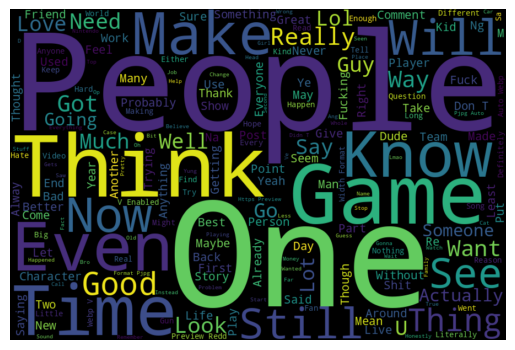

In [5]:
from wordcloud import WordCloud

# Remove the stop words
stop_words = WordCloud().stopwords
manual_stop_words = ["S"] # Enter words you want to remove here
wordcloud = WordCloud(width=900, height=600, stopwords=set(list(stop_words) + manual_stop_words)).generate(all_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### 2. Subreddit Popularity
Which subreddits do Filipinos browse more?

Text(0.5, 1.0, 'Subreddit Count')

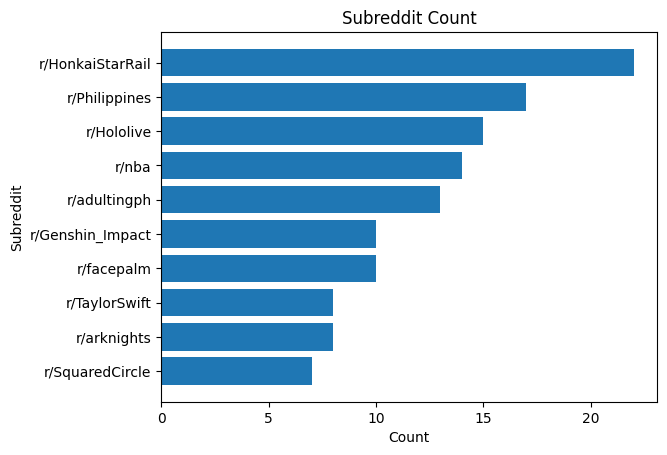

In [6]:
# Count the number of posts by subreddit
subreddit_count = {}
for post in data:
    subreddit= post["subreddit"]
    subreddit_count[subreddit] = subreddit_count.get(subreddit, 0) + 1
subreddit_count

# Reorder descending
subreddit_count = sorted(subreddit_count.items(), key=lambda x: x[1])

# Filter top 10 and add r/ prefix
subreddit_data = dict(subreddit_count[-10:])
subreddit_data = {f"r/{k}":v for k,v in subreddit_data.items()}

# Create horizontal bar plot
plt.barh(list(subreddit_data.keys()), subreddit_data.values())
# Add labels and title
plt.xlabel('Count')
plt.ylabel('Subreddit')
plt.title('Subreddit Count')

### Post Types
Does reddit display more text posts, images, video clips or external links? See post category distribution. 

Note: This is based on 500 posts scraped 

In [7]:
import numpy as np

In [36]:
# Count categories of posts
category_count = {}
for post in data:
    category = post["category"]
    category_count[category] = category_count.get(category, 0) + 1

category_count["Hosted Video"] = category_count.pop("hosted:video")
category_count["Linked Video"] = category_count.pop("rich:video")
category_count = {f"{k.title()}":v for k,v in category_count.items()}

print("{:<20}   {:<20}".format("CATEGORY", "COUNT"))
for k,v in category_count.items():
    print("{:<20}   {:<20}".format(k,v))

CATEGORY               COUNT               
Text                   130                 
Image                  206                 
Self                   12                  
Link                   24                  
Hosted Video           119                 
Linked Video           9                   


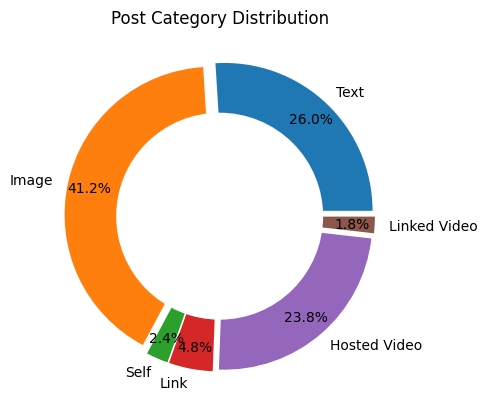

In [31]:
# Pie Chart
plt.pie(category_count.values(), labels = category_count.keys(), explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%', pctdistance=0.85)

# Make it donut
space = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(space)

plt.title('Post Category Distribution')
plt.show()

### Most Used emoji

In [124]:
import emoji
from collections import Counter

# Find all emojis in the string
emojis = [c for c in all_text if emoji.is_emoji(c) and emoji.demojize(c)  != ":light_skin_tone:"]
emoji_count = sorted(dict(Counter(emojis)).items(), key=lambda x: x[1])[-10:]
print("{:<12}   {:<50}   {:<12}".format("EMOJI", "NAME", "COUNT"))
for k,v in reversed(emoji_count):
    print("{:<12}   {:<50}   {:<12}".format(k,emoji.demojize(k).replace(':', '').replace('_', ' ').title(), v))

EMOJI          NAME                                                 COUNT       
😂              Face With Tears Of Joy                               385         
😭              Loudly Crying Face                                   312         
🤣              Rolling On The Floor Laughing                        267         
💀              Skull                                                244         
🦄              Unicorn                                              119         
😅              Grinning Face With Sweat                             106         
❤              Red Heart                                            96          
🔥              Fire                                                 75          
👍              Thumbs Up                                            56          
🥺              Pleading Face                                        55          


Text(0.5, 1.0, 'Emoji Count')

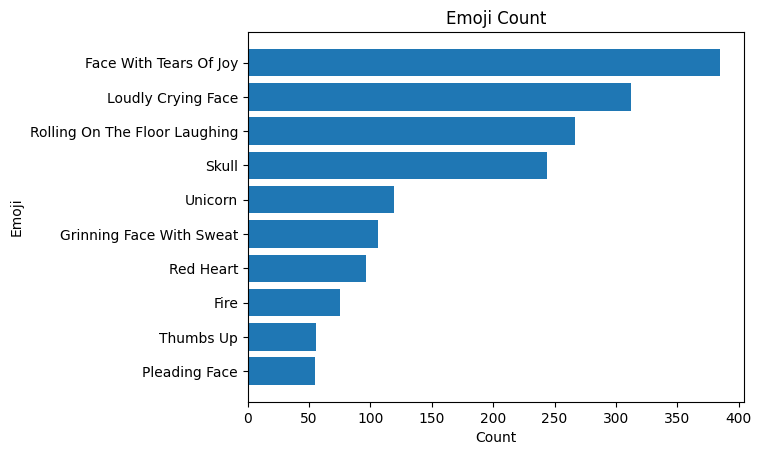

In [121]:
emoji_count = {f"{emoji.demojize(k).replace(':', '').replace('_', ' ').title()}": v for k,v in emoji_count}
emoji_count


# Create horizontal bar plot
plt.barh(list(emoji_count.keys()), emoji_count.values())
# Add labels and title
plt.xlabel('Count')
plt.ylabel('Emoji')
plt.title('Emoji Count')

### Upvote Distribution

Text(0.5, 1.0, 'Upvote Distribution (Log Scale)')

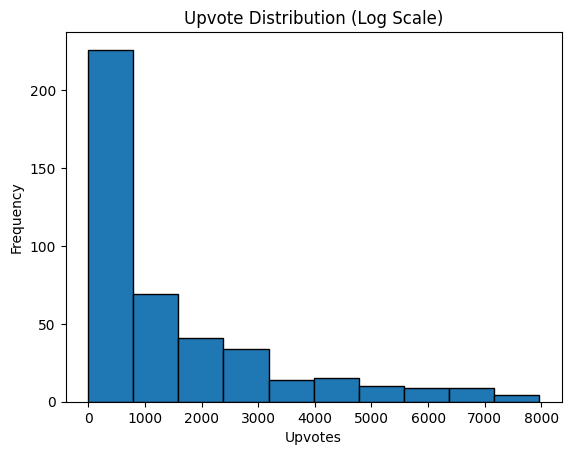

In [130]:
plt.hist([post["upvotes"] for post in data if post["upvotes"] <8000], bins=10, edgecolor='black') # if condition to remove outlier (temporary)
#plt.xscale('log')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.title('Upvote Distribution')

### Over 18 Posts?

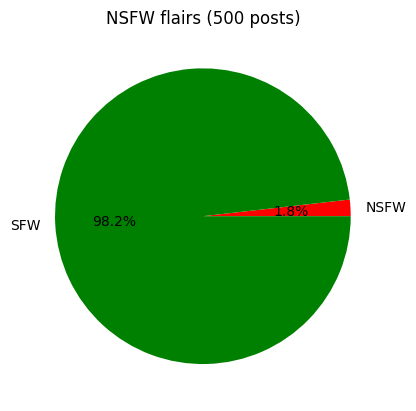

In [149]:
over_18_count = sum(d["over_18"] for d in data)
plt.pie([over_18_count, len(data) - over_18_count], labels=["NSFW", "SFW"], colors=['red', 'green'], autopct='%1.1f%%')
plt.title('NSFW flairs (500 posts)')
plt.show()